## COGS 109 Final Project ##

description:

We want to see what factors play the largest role in research receiving funding and the amount they receive. Look at what predictors lead to success in attaining research grants such as Google Scholar references, google trends popularity, institution, geographical region, grant amount, keywords. We will perform a regression analysis containing these predictors and utilize cross-validation on grant data to find the optimal model. Once we have a model, we will provide a simple web interface for allowing users to enter their own predictor values to see how much funding a specific research project will most likely receive. Overall, we are interested in seeing what correlations 

sources:
1. NSF Award info for 2018 Grant info:

https://www.research.gov/research-portal/appmanager/base/desktop?_nfpb=true&_eventName=viewQuickSearchFormEvent_so_rsr&fbclid=IwAR08Hi1Guf1sY2tLdYgKCPudJDhLsDzr6s961jM0PqqcnH6nwPpFyoSVeac


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import math

% matplotlib inline

## Source 1: ##

parameters: 45
n: 12603





In [100]:
nsf = pd.read_csv("exportAwards-2018.csv")

In [101]:
nsf.head()

,Awardee,Doing Business As Name,PD/PI Name,PD/PI Phone,PD/PI Email,Co-PD(s)/co-PI(s),Award Date,Estimated Total Award Amount,Funds Obligated to Date,Start Date,...,Primary State,Primary ZIP,Primary County,Primary Country,Primary Cong. District,Abstract at Time of Award,Publications Produced as a Result of this Research,Publications Produced as Conference Proceedings,ProjectOutcomesReport,Unnamed: 44
0,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",University of California-Los Angeles,Seth G Claudepierre,(303) 641-2461,seth.claudepierre@gmail.com,NaN,"=""09/21/2018""","=""$64,446""","=""$64,446""","=""08/01/2018""",...,CA,90095-1406,Los Angeles,US,"=""33""",This project aims to address the electromagnet...,NaN,NaN,NaN,NaN
1,UNIVERSITY OF WASHINGTON,University of Washington,Mo Li,(612) 638-8958,moli96@uw.edu,NaN,"=""09/21/2018""","=""$149,665""","=""$149,665""","=""09/01/2018""",...,WA,98195-0001,Seattle,US,"=""07""",The program aims to pioneer a flexible optical...,NaN,NaN,NaN,NaN
2,CLEMSON UNIVERSITY,Clemson University,Yongjia Song,(864) 656-9832,yongjis@clemson.edu,NaN,"=""09/21/2018""","=""$84,855""","=""$84,855""","=""09/01/2018""",...,SC,29634-0001,Clemson,US,"=""03""",Stochastic programs are popular models for pro...,NaN,NaN,NaN,NaN
3,TEXAS A&M ENGINEERING EXPERIMENT STATION,Texas A&M Engineering Experiment Station,Ya Wang,(631) 632-8322,ya.s.wang@stonybrook.edu,NaN,"=""09/21/2018""","=""$500,000""","=""$500,000""","=""09/01/2018""",...,TX,77843-3578,College Station,US,"=""17""",This Faculty Early Career Development Program ...,NaN,NaN,NaN,NaN
4,UNIVERSITY OF PITTSBURGH THE,University of Pittsburgh,Masoud Barati,(225) 578-1054,mbarati@lsu.edu,NaN,"=""09/21/2018""","=""$199,893""","=""$199,893""","=""08/28/2018""",...,PA,15213-2303,Pittsburgh,US,"=""14""",Non-convex programming involves optimization p...,NaN,NaN,NaN,NaN


In [102]:
nsf["Award Date"][0]

'="09/21/2018"'

In [103]:
#list of all the parameters (which ones should we keep)
list(nsf)

['Awardee',
 'Doing Business As Name',
 'PD/PI Name',
 'PD/PI Phone',
 'PD/PI Email',
 'Co-PD(s)/co-PI(s)',
 'Award Date',
 'Estimated Total Award Amount',
 'Funds Obligated to Date',
 'Start Date',
 'End Date',
 'Transaction Type',
 'Agency',
 'Awarding Agency Code',
 'Funding Agency Code',
 'CFDA Number',
 'Primary Program Source',
 'Award Title or Description',
 'Federal Award ID Number',
 'DUNS ID',
 'Parent DUNS ID',
 'Program',
 'Program Officer Name',
 'Program Officer Phone',
 'Program Officer Email',
 'Awardee Street',
 'Awardee City',
 'Awardee State',
 'Awardee ZIP',
 'Awardee County',
 'Awardee Country',
 'Awardee Cong. District',
 'Primary Organization Name',
 'Primary Street',
 'Primary City',
 'Primary State',
 'Primary ZIP',
 'Primary County',
 'Primary Country',
 'Primary Cong. District',
 'Abstract at Time of Award',
 'Publications Produced as a Result of this Research',
 'Publications Produced as Conference Proceedings',
 'ProjectOutcomesReport',
 'Unnamed: 44']

## Changing the Dates to DateTime Objects for plotting ##

In [104]:
nsf["Award Date"][:5] #let's change this to a times series? so we can plot and see when the most awards are being given out?

0    ="09/21/2018"
1    ="09/21/2018"
2    ="09/21/2018"
3    ="09/21/2018"
4    ="09/21/2018"
Name: Award Date, dtype: object

datetime implementation: just added it as a column in the df
https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects

In [105]:
nsf["Award Date"] = list(map(lambda x: datetime.strptime(x,'="%m/%d/%Y"'), nsf["Award Date"]))
nsf["Start Date"] = list(map(lambda x: datetime.strptime(x,'="%m/%d/%Y"'), nsf["Start Date"]))
nsf["End Date"] = list(map(lambda x: datetime.strptime(x,'="%m/%d/%Y"'), nsf['End Date']))


In [106]:
nsf.head()

,Awardee,Doing Business As Name,PD/PI Name,PD/PI Phone,PD/PI Email,Co-PD(s)/co-PI(s),Award Date,Estimated Total Award Amount,Funds Obligated to Date,Start Date,...,Primary State,Primary ZIP,Primary County,Primary Country,Primary Cong. District,Abstract at Time of Award,Publications Produced as a Result of this Research,Publications Produced as Conference Proceedings,ProjectOutcomesReport,Unnamed: 44
0,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",University of California-Los Angeles,Seth G Claudepierre,(303) 641-2461,seth.claudepierre@gmail.com,NaN,2018-09-21,"=""$64,446""","=""$64,446""",2018-08-01,...,CA,90095-1406,Los Angeles,US,"=""33""",This project aims to address the electromagnet...,NaN,NaN,NaN,NaN
1,UNIVERSITY OF WASHINGTON,University of Washington,Mo Li,(612) 638-8958,moli96@uw.edu,NaN,2018-09-21,"=""$149,665""","=""$149,665""",2018-09-01,...,WA,98195-0001,Seattle,US,"=""07""",The program aims to pioneer a flexible optical...,NaN,NaN,NaN,NaN
2,CLEMSON UNIVERSITY,Clemson University,Yongjia Song,(864) 656-9832,yongjis@clemson.edu,NaN,2018-09-21,"=""$84,855""","=""$84,855""",2018-09-01,...,SC,29634-0001,Clemson,US,"=""03""",Stochastic programs are popular models for pro...,NaN,NaN,NaN,NaN
3,TEXAS A&M ENGINEERING EXPERIMENT STATION,Texas A&M Engineering Experiment Station,Ya Wang,(631) 632-8322,ya.s.wang@stonybrook.edu,NaN,2018-09-21,"=""$500,000""","=""$500,000""",2018-09-01,...,TX,77843-3578,College Station,US,"=""17""",This Faculty Early Career Development Program ...,NaN,NaN,NaN,NaN
4,UNIVERSITY OF PITTSBURGH THE,University of Pittsburgh,Masoud Barati,(225) 578-1054,mbarati@lsu.edu,NaN,2018-09-21,"=""$199,893""","=""$199,893""",2018-08-28,...,PA,15213-2303,Pittsburgh,US,"=""14""",Non-convex programming involves optimization p...,NaN,NaN,NaN,NaN


In [107]:
grouped = nsf.groupby("Award Date").agg(['count'])
grouped.head()

,Awardee,Doing Business As Name,PD/PI Name,PD/PI Phone,PD/PI Email,Co-PD(s)/co-PI(s),Estimated Total Award Amount,Funds Obligated to Date,Start Date,End Date,...,Primary State,Primary ZIP,Primary County,Primary Country,Primary Cong. District,Abstract at Time of Award,Publications Produced as a Result of this Research,Publications Produced as Conference Proceedings,ProjectOutcomesReport,Unnamed: 44
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
Award Date,,,,,,,,,,,,,,,,,,,,,
2017-10-12,9,9,9,9,9,4,9,9,9,9,...,9,9,9,9,9,9,2,0,2,0
2017-10-13,14,14,14,13,14,2,14,14,14,14,...,14,14,14,14,14,14,0,0,1,0
2017-10-16,4,4,4,4,4,1,4,4,4,4,...,4,4,4,4,4,4,0,0,0,0
2017-10-17,7,7,7,7,7,1,7,7,7,7,...,7,7,7,7,7,7,3,0,0,0
2017-10-18,24,24,24,21,24,4,24,24,24,24,...,24,24,24,24,24,24,6,0,1,0


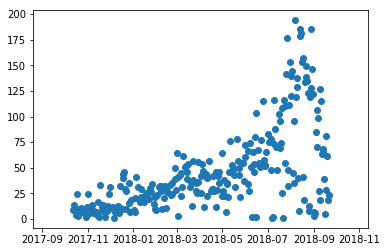

In [108]:
plt.scatter(grouped.index, grouped["Awardee"])

## Changing the String to a numerical value for the value of award ##

In [109]:
nsf.head()

,Awardee,Doing Business As Name,PD/PI Name,PD/PI Phone,PD/PI Email,Co-PD(s)/co-PI(s),Award Date,Estimated Total Award Amount,Funds Obligated to Date,Start Date,...,Primary State,Primary ZIP,Primary County,Primary Country,Primary Cong. District,Abstract at Time of Award,Publications Produced as a Result of this Research,Publications Produced as Conference Proceedings,ProjectOutcomesReport,Unnamed: 44
0,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",University of California-Los Angeles,Seth G Claudepierre,(303) 641-2461,seth.claudepierre@gmail.com,NaN,2018-09-21,"=""$64,446""","=""$64,446""",2018-08-01,...,CA,90095-1406,Los Angeles,US,"=""33""",This project aims to address the electromagnet...,NaN,NaN,NaN,NaN
1,UNIVERSITY OF WASHINGTON,University of Washington,Mo Li,(612) 638-8958,moli96@uw.edu,NaN,2018-09-21,"=""$149,665""","=""$149,665""",2018-09-01,...,WA,98195-0001,Seattle,US,"=""07""",The program aims to pioneer a flexible optical...,NaN,NaN,NaN,NaN
2,CLEMSON UNIVERSITY,Clemson University,Yongjia Song,(864) 656-9832,yongjis@clemson.edu,NaN,2018-09-21,"=""$84,855""","=""$84,855""",2018-09-01,...,SC,29634-0001,Clemson,US,"=""03""",Stochastic programs are popular models for pro...,NaN,NaN,NaN,NaN
3,TEXAS A&M ENGINEERING EXPERIMENT STATION,Texas A&M Engineering Experiment Station,Ya Wang,(631) 632-8322,ya.s.wang@stonybrook.edu,NaN,2018-09-21,"=""$500,000""","=""$500,000""",2018-09-01,...,TX,77843-3578,College Station,US,"=""17""",This Faculty Early Career Development Program ...,NaN,NaN,NaN,NaN
4,UNIVERSITY OF PITTSBURGH THE,University of Pittsburgh,Masoud Barati,(225) 578-1054,mbarati@lsu.edu,NaN,2018-09-21,"=""$199,893""","=""$199,893""",2018-08-28,...,PA,15213-2303,Pittsburgh,US,"=""14""",Non-convex programming involves optimization p...,NaN,NaN,NaN,NaN


In [110]:
def string_to_number(value):
    string = str.strip(value, '="$')
    num = string.replace(",", '')
    return int(num)

In [111]:
#https://stackoverflow.com/questions/34962104/pandas-how-can-i-use-the-apply-function-for-a-single-column
nsf["Estimated Total Award Amount"] = nsf["Estimated Total Award Amount"].apply(string_to_number)
nsf["Funds Obligated to Date"] = nsf["Funds Obligated to Date"].apply(string_to_number)

In [112]:
nsf.head()

,Awardee,Doing Business As Name,PD/PI Name,PD/PI Phone,PD/PI Email,Co-PD(s)/co-PI(s),Award Date,Estimated Total Award Amount,Funds Obligated to Date,Start Date,...,Primary State,Primary ZIP,Primary County,Primary Country,Primary Cong. District,Abstract at Time of Award,Publications Produced as a Result of this Research,Publications Produced as Conference Proceedings,ProjectOutcomesReport,Unnamed: 44
0,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",University of California-Los Angeles,Seth G Claudepierre,(303) 641-2461,seth.claudepierre@gmail.com,NaN,2018-09-21,64446,64446,2018-08-01,...,CA,90095-1406,Los Angeles,US,"=""33""",This project aims to address the electromagnet...,NaN,NaN,NaN,NaN
1,UNIVERSITY OF WASHINGTON,University of Washington,Mo Li,(612) 638-8958,moli96@uw.edu,NaN,2018-09-21,149665,149665,2018-09-01,...,WA,98195-0001,Seattle,US,"=""07""",The program aims to pioneer a flexible optical...,NaN,NaN,NaN,NaN
2,CLEMSON UNIVERSITY,Clemson University,Yongjia Song,(864) 656-9832,yongjis@clemson.edu,NaN,2018-09-21,84855,84855,2018-09-01,...,SC,29634-0001,Clemson,US,"=""03""",Stochastic programs are popular models for pro...,NaN,NaN,NaN,NaN
3,TEXAS A&M ENGINEERING EXPERIMENT STATION,Texas A&M Engineering Experiment Station,Ya Wang,(631) 632-8322,ya.s.wang@stonybrook.edu,NaN,2018-09-21,500000,500000,2018-09-01,...,TX,77843-3578,College Station,US,"=""17""",This Faculty Early Career Development Program ...,NaN,NaN,NaN,NaN
4,UNIVERSITY OF PITTSBURGH THE,University of Pittsburgh,Masoud Barati,(225) 578-1054,mbarati@lsu.edu,NaN,2018-09-21,199893,199893,2018-08-28,...,PA,15213-2303,Pittsburgh,US,"=""14""",Non-convex programming involves optimization p...,NaN,NaN,NaN,NaN


In [119]:
awardee = nsf.groupby("Awardee").agg(['count'])
awardee.head()

,Doing Business As Name,PD/PI Name,PD/PI Phone,PD/PI Email,Co-PD(s)/co-PI(s),Award Date,Estimated Total Award Amount,Funds Obligated to Date,Start Date,End Date,...,Primary State,Primary ZIP,Primary County,Primary Country,Primary Cong. District,Abstract at Time of Award,Publications Produced as a Result of this Research,Publications Produced as Conference Proceedings,ProjectOutcomesReport,Unnamed: 44
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
Awardee,,,,,,,,,,,,,,,,,,,,,
"21ST CENTURY PARTNERSHIP FOR STEM EDUCATION, THE",2,2,2,2,0,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
2B TECHNOLOGIES INC,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
"3DEO, INC.",1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
"3I DIAGNOSTICS, INC.",1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
4 D TECHNOLOGY CORPORATION,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,0


In [131]:
#for plotting barcharts from pandas data frame
#https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html